# ANÁLISIS DE NOTAS DEL EXAMEN DE PRIMERA UNIDAD

**Alumno:** VASQUEZ RAMOS, Jose Manuel

**Fecha:** 02/04/2025

___

Se realizó un estudio estadístico completo de los resultados académicos, evaluando comparativamente el rendimiento en los diferentes tipos de evaluaciones (A, B y C) mediante los siguientes enfoques:

1. **Estadística Descriptiva:** Se calcularon medidas de tendencia central (media, mediana) y dispersión (desviación estándar, rango intercuartílico) que permitieron caracterizar cuantitativamente la distribución de calificaciones para cada modalidad de examen.

2. **Gráfico de Barras Agrupadas:** Esta visualización comparó las frecuencias absolutas de cada rango de calificación, revelando diferencias significativas en los patrones de distribución entre los tipos de evaluación.

3. **Gráfico de Áreas Superpuestas:** El análisis mostró los rangos de calificación con mayor coincidencia entre evaluaciones, identificando dónde se concentraba el mayor número de estudiantes en cada modalidad.

4. **Diagrama de Caja y Bigotes:** Permitió detectar diferencias en la dispersión de los resultados y valores atípicos, complementando el análisis con una perspectiva robusta de la variabilidad en el desempeño.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Checkbox

## Carga de datos

In [2]:
df = pd.read_csv('notas_1u.csv')
df.head()

,Alumno,Nota,Tipo_Examen
0,Alumno1,15.0,C
1,Alumno2,13.0,C
2,Alumno3,14.0,C
3,Alumno4,10.0,A
4,Alumno5,15.0,C


## Estadísticas descriptivas

In [3]:
estadisticas = df.groupby('Tipo_Examen')['Nota'].describe()
estadisticas

,count,mean,std,min,25%,50%,75%,max
Tipo_Examen,,,,,,,,
A,13.0,14.384615,2.433737,10.0,13.0,14.0,16.0,19.0
B,13.0,17.384615,3.452981,9.0,18.0,19.0,19.0,20.0
C,13.0,14.461538,3.178453,9.0,13.0,14.0,17.0,20.0


## Análisis gráfico

In [4]:
# Configuración global fija
plt.style.use('default')
FIG_SIZE = (12, 6)
COLORES = {'A': '#1f77b4', 'B': '#ff7f0e', 'C': '#2ca02c'}
Y_MARGIN = 1

frecuencias = df.groupby(['Nota', 'Tipo_Examen']).size().unstack(fill_value=0).sort_index()
tipos_disponibles = sorted(frecuencias.columns.tolist())
max_freq = frecuencias.max().max()
y_limit = (0, max_freq + Y_MARGIN)

# Posiciones fijas para evitar movimiento
posiciones = {'A': -0.3, 'B': 0, 'C': 0.3}
ancho_barra = 0.25

### 1. Gráfico de Barras Agrupadas

In [5]:
# Crear controles
controles_barras = {}
if 'A' in tipos_disponibles:
    controles_barras['mostrar_A'] = Checkbox(value=True, description='Tipo A')
if 'B' in tipos_disponibles:
    controles_barras['mostrar_B'] = Checkbox(value=True, description='Tipo B')
if 'C' in tipos_disponibles:
    controles_barras['mostrar_C'] = Checkbox(value=True, description='Tipo C')

@interact(**controles_barras)
def actualizar_barras(mostrar_A=True, mostrar_B=True, mostrar_C=True):
    plt.figure(figsize=FIG_SIZE)
    ax = plt.gca()

    # Determinar tipos activos
    tipos_activos = []
    if 'A' in tipos_disponibles and mostrar_A:
        tipos_activos.append('A')
    if 'B' in tipos_disponibles and mostrar_B:
        tipos_activos.append('B')
    if 'C' in tipos_disponibles and mostrar_C:
        tipos_activos.append('C')

    # Dibujar barras con posiciones fijas
    for tipo in tipos_activos:
        pos = posiciones[tipo] if len(tipos_activos) > 1 else 0
        plt.bar(frecuencias.index + pos,
               frecuencias[tipo],
               width=ancho_barra,
               color=COLORES[tipo],
               label=tipo)

    # Configuración fija del gráfico
    ax.set_ylim(y_limit)
    ax.set_xlim(frecuencias.index[0]-1, frecuencias.index[-1]+1)
    ax.set_title('Distribución de Notas por Tipo de Examen', pad=20)
    ax.set_xlabel('Nota', labelpad=10)
    ax.set_ylabel('Frecuencia', labelpad=10)
    ax.grid(axis='y', linestyle='--', alpha=0.3)

    if tipos_activos:
        ax.legend(title='Tipo de Examen')
    else:
        ax.text(0.5, 0.5, 'Selecciona al menos un tipo de examen',
               ha='center', va='center', transform=ax.transAxes, fontsize=12)

    plt.tight_layout()
    plt.show()

interactive(children=(Checkbox(value=True, description='Tipo A'), Checkbox(value=True, description='Tipo B'), …

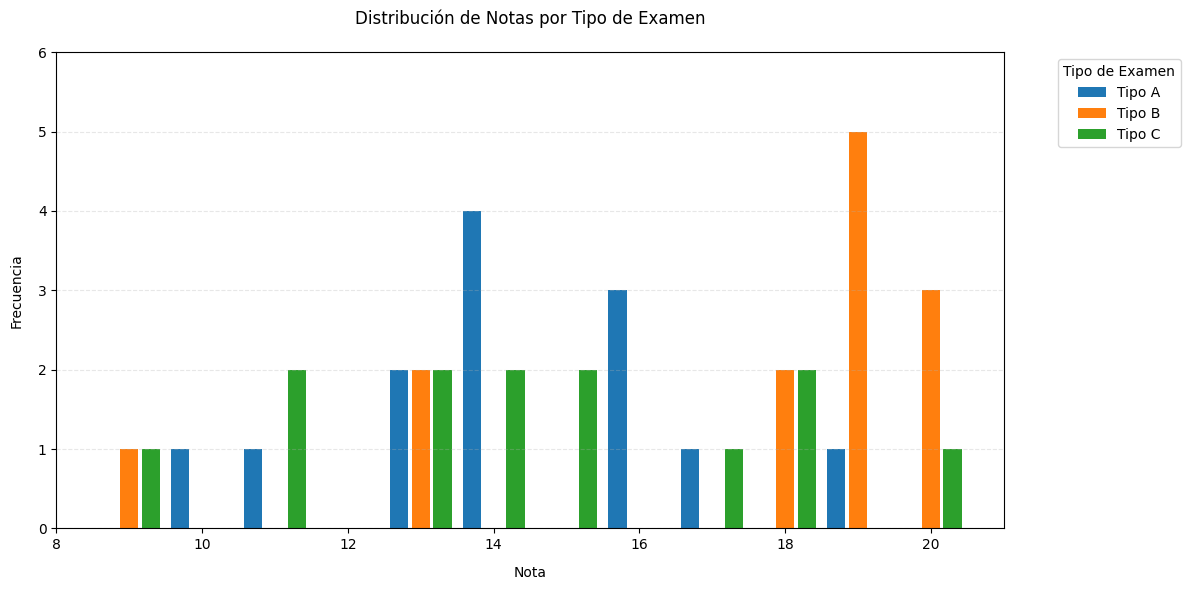

In [6]:
# Gráfico de barras no interactivo
plt.figure(figsize=FIG_SIZE)
ax = plt.gca()

# Dibujar todas las barras disponibles
for tipo in tipos_disponibles:
    pos = posiciones[tipo] if len(tipos_disponibles) > 1 else 0
    plt.bar(frecuencias.index + pos,
           frecuencias[tipo],
           width=ancho_barra,
           color=COLORES[tipo],
           label=f'Tipo {tipo}')

# Configuración del gráfico
ax.set_ylim(y_limit)
ax.set_xlim(frecuencias.index[0]-1, frecuencias.index[-1]+1)
ax.set_title('Distribución de Notas por Tipo de Examen', pad=20)
ax.set_xlabel('Nota', labelpad=10)
ax.set_ylabel('Frecuencia', labelpad=10)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend(title='Tipo de Examen', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### 2. Gráfico de Área

In [7]:
# Usamos los mismos controles
controles_areas = controles_barras.copy()

@interact(**controles_areas)
def actualizar_areas(mostrar_A=True, mostrar_B=True, mostrar_C=True):
    plt.figure(figsize=FIG_SIZE)
    ax = plt.gca()

    tipos_activos = []
    if 'A' in tipos_disponibles and mostrar_A:
        tipos_activos.append('A')
    if 'B' in tipos_disponibles and mostrar_B:
        tipos_activos.append('B')
    if 'C' in tipos_disponibles and mostrar_C:
        tipos_activos.append('C')

    if tipos_activos:
        frecuencias[tipos_activos].plot(
            kind='area',
            stacked=False,
            alpha=0.4,
            color=[COLORES[t] for t in tipos_activos],
            ax=ax
        )
        ax.set_xticks(frecuencias.index)
    else:
        ax.text(0.5, 0.5, 'Selecciona al menos un tipo de examen',
               ha='center', va='center', transform=ax.transAxes, fontsize=12)

    ax.set_title('Distribución Acumulada de Notas')
    ax.set_xlabel('Nota')
    ax.set_ylabel('Frecuencia Acumulada')
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    if tipos_activos:
        ax.legend(title='Tipo de Examen')

    plt.tight_layout()
    plt.show()

interactive(children=(Checkbox(value=True, description='Tipo A'), Checkbox(value=True, description='Tipo B'), …

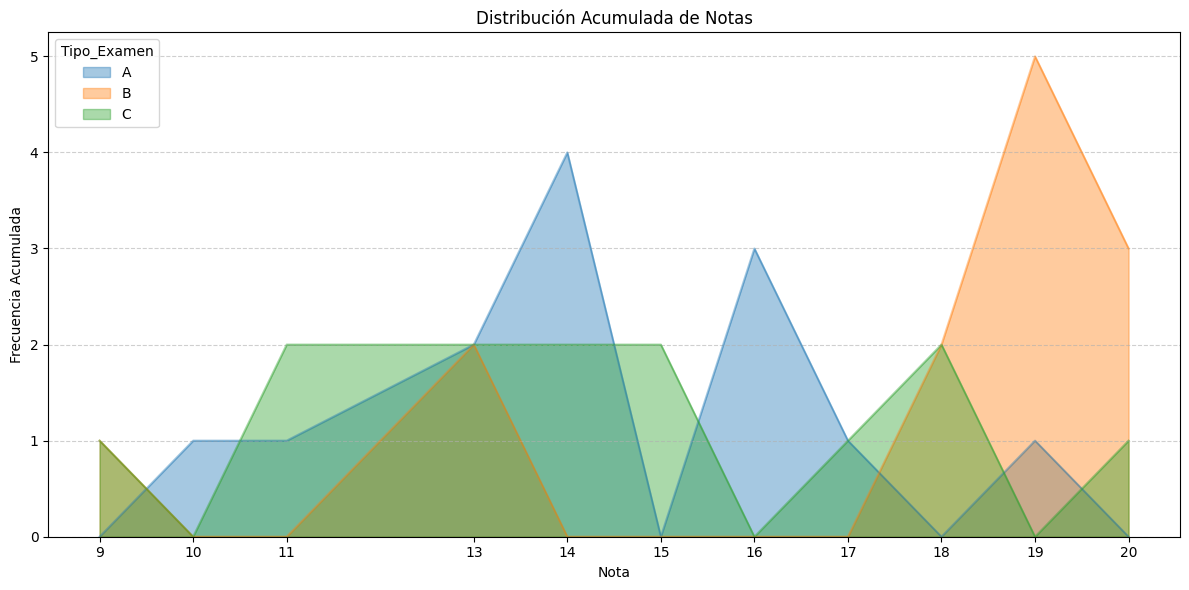

In [8]:
# Gráfico de áreas no interactivo
plt.figure(figsize=FIG_SIZE)
ax = plt.gca()

frecuencias[tipos_disponibles].plot(
    kind='area',
    stacked=False,
    alpha=0.4,
    color=[COLORES[t] for t in tipos_disponibles],
    ax=ax
)
ax.set_xticks(frecuencias.index)

ax.set_title('Distribución Acumulada de Notas')
ax.set_xlabel('Nota')
ax.set_ylabel('Frecuencia Acumulada')
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### 3. Diagrama de Caja y Bigotes

<Figure size 1200x600 with 0 Axes>

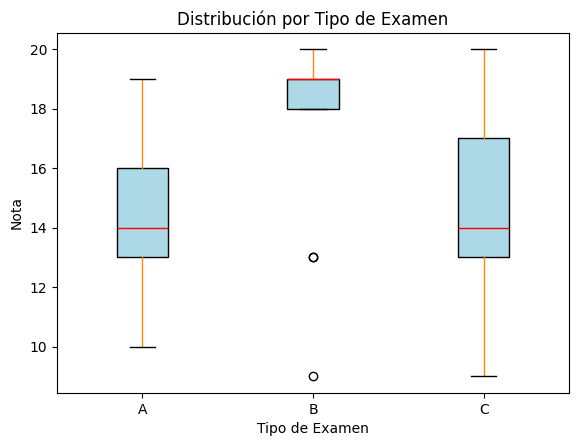

In [9]:
plt.figure(figsize=FIG_SIZE)
df.boxplot(column='Nota', by='Tipo_Examen', grid=False,
           patch_artist=True,
           boxprops={'facecolor': 'lightblue'},
           medianprops={'color': 'red'},
           whiskerprops={'color': 'darkorange'})
plt.title('Distribución por Tipo de Examen')
plt.suptitle('')
plt.xlabel('Tipo de Examen')
plt.ylabel('Nota')
plt.show()

## Conclusiones finales

**Examen A**

Es el más difícil, ya que tiene la calificación promedio más baja.

- Media más baja (14.38): Indica que fue más difícil que el examen B.
- Mediana (14) y rango más estrecho (10 a 19): Los puntajes están más agrupados, con menos dispersión.

**Examen B**

Es el más fácil de los tres exámenes, ya que los estudiantes obtuvieron mejores resultados en promedio.

- Media más alta (17.38): En promedio, los estudiantes obtuvieron mejores calificaciones en este examen.
- Mediana alta (19): La mitad de los estudiantes sacaron 19 o más, lo que indica un buen rendimiento general.
- Rango de valores altos (9 a 20): Aunque el mínimo es bajo, la mayoría de los resultados están cerca del máximo.

**Examen C**

Dificultad intermedia, aunque más impredecible; algunos estudiantes lo hicieron muy bien, otros muy mal.

- Media similar a A (14.46): Apenas un poco más alta que la de A.
- Mayor desviación estándar (3.18 vs. 2.43): Más variabilidad en los resultados.
- Rango completo (9 a 20): Hay tanto calificaciones bajas como perfectas.